In [1]:
#!pip install aquacrop==0.0.13

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from aquacrop.core import *
from aquacrop.classes import *

# AquaCrop-OS tutorial: basics

<img src="imgs/crop_soil_system.jpg" width="400" height="350"/> 

## The aquacrop model has 3 components:

1) Climate: rainfall, temperature, evapotranspiration and CO2

2) Soil water balance 

3) Crop growth

## In order to run the model we have to define: climate, soil, crop and time scale

The first run will take ~50s as we use jit compiler to speed up the model. After that a single season should be < 0.2s. Run the cell below twice to see the difference

In [4]:
wdf = prepare_weather(get_filepath('champion_weather.txt'))
soil = SoilClass('loam')
crop = CropClass('maize')
model = AquaCropModel('2000/05/01','2018/10/31',wdf,soil,crop)
model.initialize()
model.step(till_termination=True)
final = model.Outputs.Final; final

,Season,Name,HarvestDate,Step,Yield,Tirr
0,0,maize,2000-09-13,134,9.369929,0.0
1,1,maize,2001-09-20,506,11.295915,0.0
2,2,maize,2002-09-16,867,9.494147,0.0
3,3,maize,2003-08-25,1210,3.591865,0.0
4,4,maize,2004-10-04,1616,14.699277,0.0
5,5,maize,2005-09-22,1969,12.619490,0.0
6,6,maize,2006-09-15,2327,13.472787,0.0
7,7,maize,2007-09-17,2694,13.002529,0.0
8,8,maize,2008-10-04,3077,14.340670,0.0
9,9,maize,2009-10-20,3458,14.694203,0.0


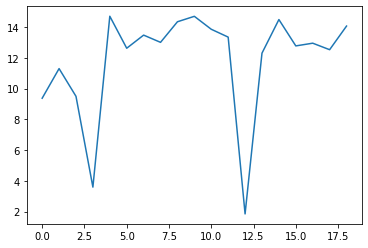

In [5]:
# run over multiple years and plot
final.Yield.plot()

# Weather

The first thing we define is the weather; aquacrop has a number of built in climate files such as from Champion, Nebraska. Others available can be seen with `os.listdir(aquacrop.data.__path__[0])`

In [6]:
wdf = prepare_weather(get_filepath('champion_weather.txt'))
wdf.head()

,MinTemp,MaxTemp,Precipitation,ReferenceET,Date
0,-21.11,3.33,0.0,1.59,1982-01-01
1,-10.00,0.56,0.0,0.86,1982-01-02
2,-11.67,-2.22,0.0,0.72,1982-01-03
3,-12.22,7.22,0.0,1.71,1982-01-04
4,-14.44,-1.11,0.0,0.92,1982-01-05


Of course you can use any climate file as long as it contains daily values of:
- min temperature
- max temperature
- Rainfall
- Reference EvapoTranspiration
- Date

they must have the correct column names as shown above

# Soil

Next we create a soil profile. This can be done simply using one of the built in soil types

In [7]:
soil = SoilClass('clay_loam'); soil.profile

,Comp,Layer,dz,dzsum,zBot,zTop,zMid,th_dry,th_wp,th_fc,th_s,Ksat,penetrability,tau
0,0,1.0,0.1,0.1,0.1,0.0,0.05,0.109,0.218,0.467,0.664,490.9,100,0.76
1,1,1.0,0.1,0.2,0.2,0.1,0.15,0.109,0.218,0.467,0.664,490.9,100,0.76
2,2,1.0,0.1,0.3,0.3,0.2,0.25,0.109,0.218,0.467,0.664,490.9,100,0.76
3,3,1.0,0.1,0.4,0.4,0.3,0.35,0.109,0.218,0.467,0.664,490.9,100,0.76
4,4,1.0,0.1,0.5,0.5,0.4,0.45,0.109,0.218,0.467,0.664,490.9,100,0.76
5,5,1.0,0.1,0.6,0.6,0.5,0.55,0.109,0.218,0.467,0.664,490.9,100,0.76
6,6,1.0,0.2,0.8,0.8,0.6,0.70,0.109,0.218,0.467,0.664,490.9,100,0.76
7,7,1.0,0.2,1.0,1.0,0.8,0.90,0.109,0.218,0.467,0.664,490.9,100,0.76
8,8,1.0,0.2,1.2,1.2,1.0,1.10,0.109,0.218,0.467,0.664,490.9,100,0.76
9,9,1.0,0.2,1.4,1.4,1.2,1.30,0.109,0.218,0.467,0.664,490.9,100,0.76


as we can see above the soil profile is broken up compartments.

Run the cell below to see the souce code for `SoilClass`. There you can see all the default soil types as well as custom paramaters you can specify

In [8]:
#SoilClass??

We can also create our own custom soil profile

In [9]:
soil = SoilClass('custom',dz=[0.1]*8+[0.2]*4)
soil.add_layer(thickness=0.8,thWP=0.1,thFC=0.45,thS=0.55,Ksat=500,penetrability=100) # add layer using hydraulic proeprties
soil.add_layer_from_texture(thickness=0.8,Sand=30,Clay=30,OrgMat=2.5,penetrability=100) # add layer using texture proeprties
soil.profile

,Comp,Layer,dz,dzsum,zBot,zTop,zMid,th_dry,th_wp,th_fc,th_s,Ksat,penetrability,tau
0,0,1.0,0.1,0.1,0.1,0.0,0.05,0.0500,0.100,0.450,0.55,500.0,100.0,0.76
1,1,1.0,0.1,0.2,0.2,0.1,0.15,0.0500,0.100,0.450,0.55,500.0,100.0,0.76
2,2,1.0,0.1,0.3,0.3,0.2,0.25,0.0500,0.100,0.450,0.55,500.0,100.0,0.76
3,3,1.0,0.1,0.4,0.4,0.3,0.35,0.0500,0.100,0.450,0.55,500.0,100.0,0.76
4,4,1.0,0.1,0.5,0.5,0.4,0.45,0.0500,0.100,0.450,0.55,500.0,100.0,0.76
5,5,1.0,0.1,0.6,0.6,0.5,0.55,0.0500,0.100,0.450,0.55,500.0,100.0,0.76
6,6,1.0,0.1,0.7,0.7,0.6,0.65,0.0500,0.100,0.450,0.55,500.0,100.0,0.76
7,7,1.0,0.1,0.8,0.8,0.7,0.75,0.0500,0.100,0.450,0.55,500.0,100.0,0.76
8,8,2.0,0.2,1.0,1.0,0.8,0.90,0.0955,0.191,0.445,0.63,430.0,100.0,0.72
9,9,2.0,0.2,1.2,1.2,1.0,1.10,0.0955,0.191,0.445,0.63,430.0,100.0,0.72


## Crop

Next we need a crop. Again lets look at the source code to see what we can do (warning there is a lot of paramaters we can define)


As an example lets change the planting date to May 15th

In [19]:
crop = CropClass('maize',PlantingDate="05/15",HarvestDate="11/15")
crop2 = CropClass('maize')

In [20]:
crop.PlantingDate, crop2.PlantingDate

('05/15', '05/01')

In [15]:
#crop.__dict__

In [28]:
def run_model(crop):
    model = AquaCropModel('1990/05/01','2001/11/30',wdf,soil,crop)
    model.initialize()
    model.step(till_termination=True)
    return model.Outputs.Final

In [29]:
final = run_model(crop)
final2= run_model(crop2)

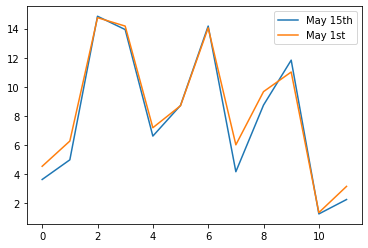

In [30]:
final.Yield.plot(label="May 15th",legend=True)
final2.Yield.plot(label="May 1st",legend=True)

## So in this tutorial we have learned:

 1) How to run the AquaCrop model for a given Climate/Crop/Soil
 
 2) How to create a custom soil profile
 
 3) How to edit and change crop and soil paramaters 

## Try the next tutorial to see how we can use AquaCrop-OSP to compare irrigaiton strategies